## GOAL
- Using **networkx** to create a **random graph**, **small-world graph**, **scale-free network**

- References: https://www.cnblogs.com/forstudy/archive/2012/03/20/2407954.html

In [65]:
# import module and define supporting functions
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
boostrap = 500
def MyGraw(Gs):
    '''定义一个函数，直接调用就可以画图，免得代码重复'''
    nx.draw(Gs, with_labels=True, 
        pos=nx.kamada_kawai_layout(Gs), 
        edge_color='#3D0C11')
def stats_cacu(Gs):
    '''计算图的一些指标，用来对比，输入为图对象的可迭代容器
    计算：度分布'''
    stats = {'std':[]}
    for G in Gs:
        s = 0
        for per_g in G:
            degreeDistri = [item[1] for item in nx.degree(per_g)]
            degreeDistri_std = np.array(degreeDistri).std()  # 度数标准差
            s += degreeDistri_std
        stats['std'].append(s/boostrap)
    return stats


## 00 Generate a regular graph

- Use **random_regular_graph(d, n)** method can generate a regular graph with n nodes, each of which has d neighbors
- **Draw** it!

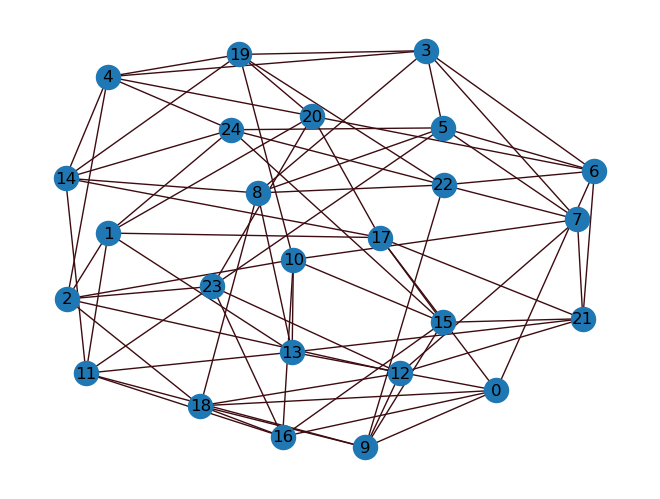

In [66]:

RG1 = [nx.random_regular_graph(6, 25) for i in range(boostrap)]
MyGraw(RG1[0])


## 01 Generate an ER random graph

- Use **random_graphs.erdos_renyi_graph(n,p)** to generates an ER random graph with n nodes connected with probability p

- **Draw** it!

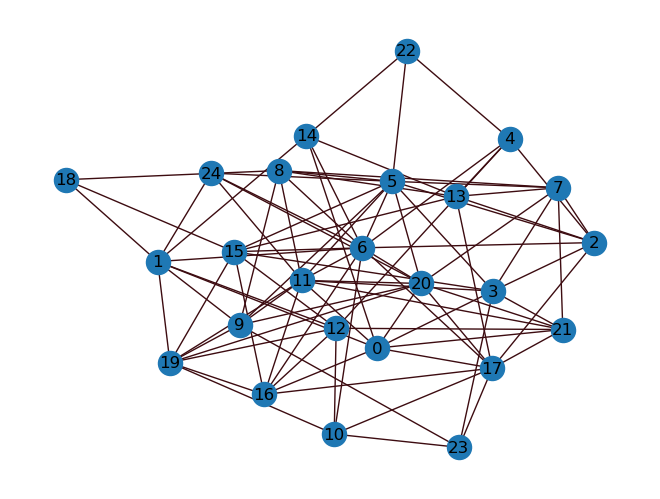

In [67]:
RG2 = [nx.random_graphs.erdos_renyi_graph(25, 6/24) for i in range(boostrap)]
MyGraw(RG2[0])

## 02 Generate a small-world network

- Using **random_graphs.watts_strogatz_graph(n, k, p)** to generate a WS small-world network containing n nodes, each node has k neighbors, reconnecting edges with probability p randomization.

- **Draw** your graph!

Text(0.5, 1.0, 'p=0.8')

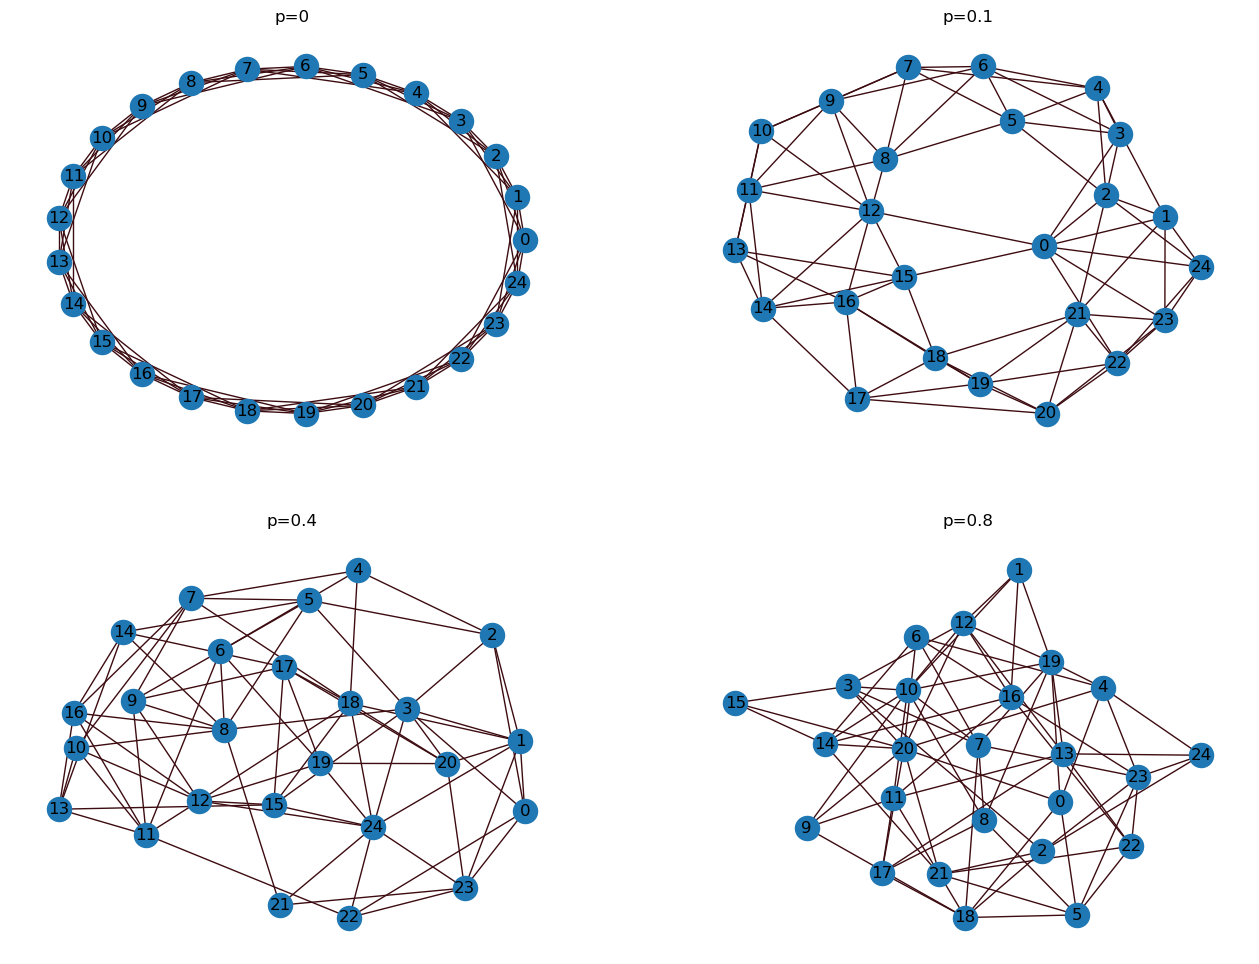

In [68]:
RG3 = [nx.random_graphs.watts_strogatz_graph(25, 6, 0) for i in range(boostrap)]
RG31 = [nx.random_graphs.watts_strogatz_graph(25, 6, 0.1)  for i in range(boostrap)]
RG34 = [nx.random_graphs.watts_strogatz_graph(25, 6, 0.4)  for i in range(boostrap)]
RG38 = [nx.random_graphs.watts_strogatz_graph(25, 6, 0.8)  for i in range(boostrap)]
plt.figure(figsize=(16, 12), dpi=100)

plt.subplot(2, 2, 1)
MyGraw(RG3[0])
plt.title('p=0')

plt.subplot(2, 2, 2)
MyGraw(RG31[0])
plt.title('p=0.1')

plt.subplot(2, 2, 3)
MyGraw(RG34[0])
plt.title('p=0.4')

plt.subplot(2, 2, 4)
MyGraw(RG38[0])
plt.title('p=0.8')

## 03 Generate a scale-free network

- Using **random_graphs.barabasi_albert_graph(n, m)** to generate a scale-free BA network with n nodes and m edges added at a time

- **Draw** it!

Text(0.5, 1.0, 'm = 6')

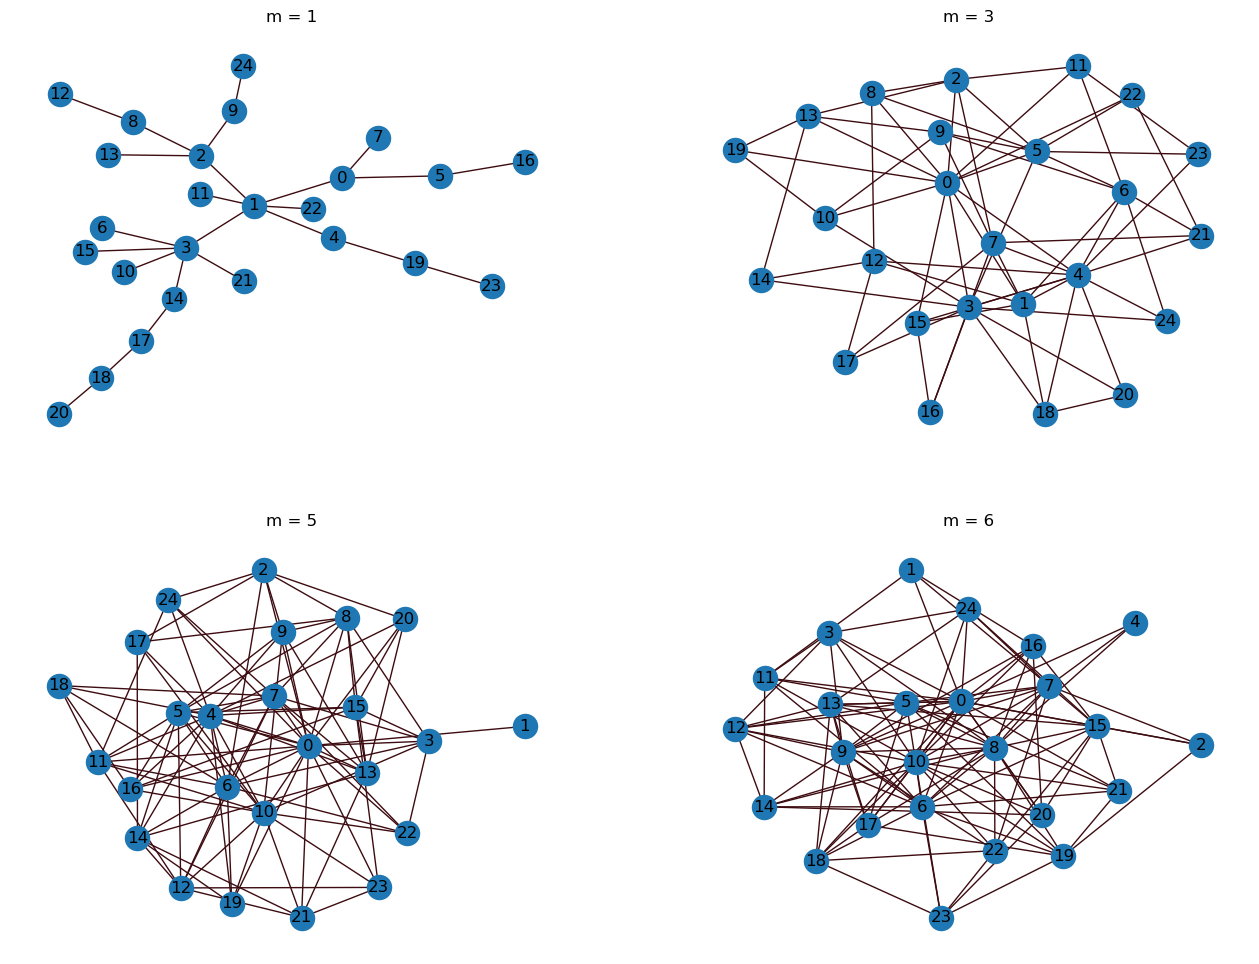

In [69]:
RG41 = [nx.random_graphs.barabasi_albert_graph(25, 1) for i in range(boostrap)]
RG43 = [nx.random_graphs.barabasi_albert_graph(25, 3) for i in range(boostrap)]
RG45 = [nx.random_graphs.barabasi_albert_graph(25, 5) for i in range(boostrap)]
RG46 = [nx.random_graphs.barabasi_albert_graph(25, 6) for i in range(boostrap)]
RG47 = [nx.random_graphs.barabasi_albert_graph(25, 7) for i in range(boostrap)]
RG48 = [nx.random_graphs.barabasi_albert_graph(25, 8) for i in range(boostrap)]
RG49 = [nx.random_graphs.barabasi_albert_graph(25, 9) for i in range(boostrap)]


plt.figure(figsize=(16, 12), dpi=100)
plt.subplot(2, 2, 1)
MyGraw(RG41[0])
plt.title('m = 1')

plt.subplot(2, 2, 2)
MyGraw(RG43[0])
plt.title('m = 3')

plt.subplot(2, 2, 3)
MyGraw(RG45[0])
plt.title('m = 5')

plt.subplot(2, 2, 4)
MyGraw(RG46[0])
plt.title('m = 6')





## Bonus (Optional)

- What's the differences between the above four networks?

In [70]:
stats = stats_cacu([RG1, RG2, RG3, RG31, RG34, RG38, RG41, RG43, RG45, RG46, RG47, RG48, RG49])
print(['RG1, RG2, RG3, RG31, RG34, RG38, RG41, RG42, RG43, RG44'])
print(stats)

'''以上指标都是计算了500个随机生成的同参数图得到的结果取平均，（很暴力也很占内存，在大的图中千万不要效仿这种写法bushi）'''
'''
除了RG41和RG43之外的图，我都控制了这些图的密度大致相等
根据如上数据可以得到以下不同点：
1、根据度数分布的标准差，可以得到不同图中度数的集中程度
    RG1是规则的图，每个节点度严格相等；RG3是小世界模型随机化前的图，是更加规则的图，节点间度数差异也为0
    RG2是n*(n-1)/2个边等可能地随机生成的情况下，节点度数的方差，其某种意义上可以视为一个基准，
    RG3系列图，可以看出随着随机化程度增高，其度数方差在增大，但没有达到RG2随机图的程度
    R4系列的图是，度数越高的节点，新加入的边越有可能连接到它，这种模型显示了一种马太效应，具有更大的度方差，
    且方差差距随着“资源增加”没有得到好转'''

['RG1, RG2, RG3, RG31, RG34, RG38, RG41, RG42, RG43, RG44']
{'std': [0.0, 1.9931422793505613, 0.0, 0.7421046448004213, 1.337941854440365, 1.5859562034305328, 1.8760463119590078, 2.961479044748962, 3.4991237088844906, 3.7451381595127518, 3.95156525942414, 4.172944553519082, 4.450112480076004]}


'\n除了RG41和RG43之外的图，我都控制了这些图的密度大致相等\n根据如上数据可以得到以下不同点：\n1、根据度数分布的标准差，可以得到不同图中度数的集中程度\n    RG1是规则的图，每个节点度严格相等；RG3是小世界模型随机化前的图，是更加规则的图，节点间度数差异也为0\n    RG2是n*(n-1)/2个边等可能地随机生成的情况下，节点度数的方差，其某种意义上可以视为一个基准，\n    RG3系列图，可以看出随着随机化程度增高，其度数方差在增大，但没有达到RG2随机图的程度\n    R4系列的图是，度数越高的节点，新加入的边越有可能连接到它，这种模型显示了一种马太效应，具有更大的度方差，\n    且方差随着“资源增加”没有得到好转'